In [ ]:
import os
import sys
import json
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

sys.path.insert(0, "../")
from utils import grid_plot, fix_seed
from models import pretrained

from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
#classifier = pretrained.MnistClassifier()

def tensor_to_grid(tensor, nrow=9):
    grid = make_grid(tensor, nrow=nrow, normalize=True)
    grid = grid.cpu().detach().numpy()
    grid = np.transpose(grid, (1,2,0))
    return grid

In [87]:
folders = [
    'mnist_ali_full',
    'mnist_ali_lvl0',
    'mnist_ali_lvl1',
    'mnist_ali_lvl2',
    'mnist_ali_lvl3',
    'mnist_ali_robust',
    'mnist_ali_test',
    'svhn_ali_full',
    'svhn_ali_lvl0',
    'svhn_ali_lvl1',
    'svhn_ali_lvl2',
    'svhn_ali_lvl3',
]

for name in folders:
    experiment = os.path.join('experiments', name)
    runs = os.listdir(experiment)

    for i, run in enumerate(runs):
        path = os.path.join(experiment, run)

        # Load data (deserialize)
        with open(path, 'rb') as handle:
            data = pickle.load(handle)
        x0 = torch.tensor(data['x0'], device='cuda')
        x_per = torch.tensor(data['x_per'], device='cuda')

        # Plot
        level = data['json']['generator_level']
        distance = data['params']['distance']
        criterion = data['params']['constraint']
        method = data['params']['self']

        # Prepare grids
        grid_x0 = tensor_to_grid(x0)
        grid_x_per = tensor_to_grid(x_per)
        grid_diff = tensor_to_grid((x_per - x0).abs()**(1/2))

        # Plots
        fig = plt.figure(figsize=(25, 12))
        ax1 = fig.add_subplot(131)
        ax1.set_axis_off()
        ax1.imshow(grid_x0)
        ax1.title.set_text('Original')

        ax2 = fig.add_subplot(132)
        ax2.set_axis_off()
        ax2.imshow(grid_x_per)
        ax2.title.set_text('Perturbed')

        ax3 = fig.add_subplot(133)
        ax3.set_axis_off()
        ax3.imshow(grid_diff)
        ax3.title.set_text('Difference')


        fig.suptitle(f"{name}: {criterion}-{method}-{distance}-lvl{level}", fontsize=16)
        fig.tight_layout()
        fig.savefig(f'perturbed_images/results-{name}-{i}.png')
        plt.close()

ProjectionMethod - wd


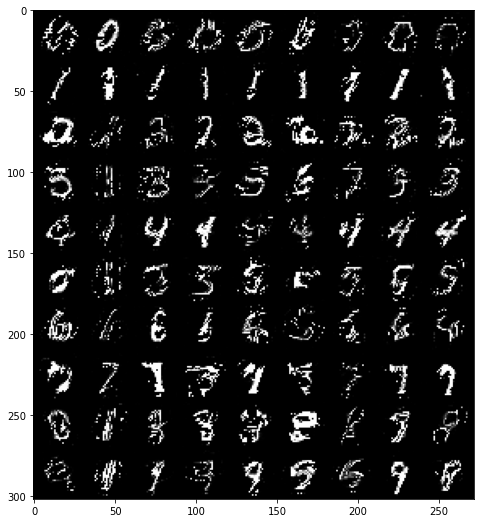

tensor(0.0712, device='cuda:0')
ProjectionMethod - l2


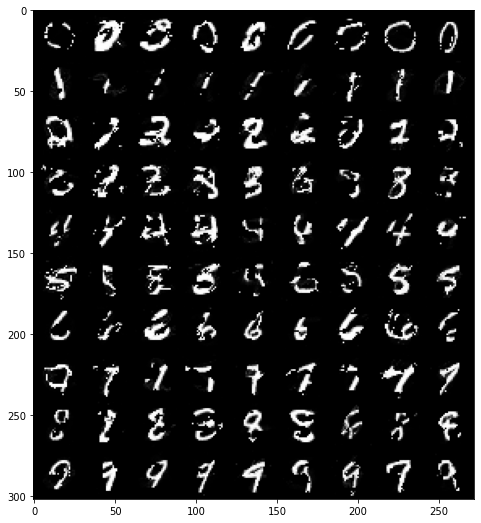

tensor(0.0439, device='cuda:0')
PenaltyPopMethod - wd


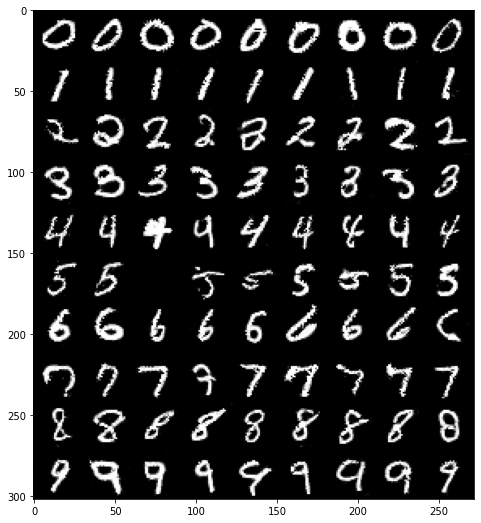

tensor(0.0054, device='cuda:0')
PenaltyPopMethod - l2


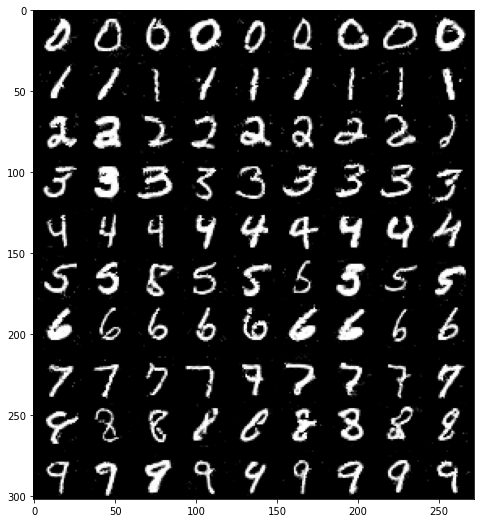

tensor(0.0025, device='cuda:0')


In [46]:
experiment = os.path.join('experiments', 'mnist_ali_lvl3')
runs = os.listdir(experiment)

for run in runs:
    path = os.path.join(experiment, run)

    # Load data (deserialize)
    with open(path, 'rb') as handle:
        data = pickle.load(handle)

    x0 = torch.tensor(data['x0'], device='cuda')
    x_per = torch.tensor(data['x_per'], device='cuda')

    print(f"{data['params']['self']} - {data['params']['distance']}")
    #grid_plot(x0, nrows=9)
    grid_plot(x_per, nrows=9)

    print(((x0 - x_per)**2).mean())

In [7]:
path = r"C:\Users\cerma\Downloads\test_0_Aug26-17-16-36.pickle"

ProjectionMethod - wd


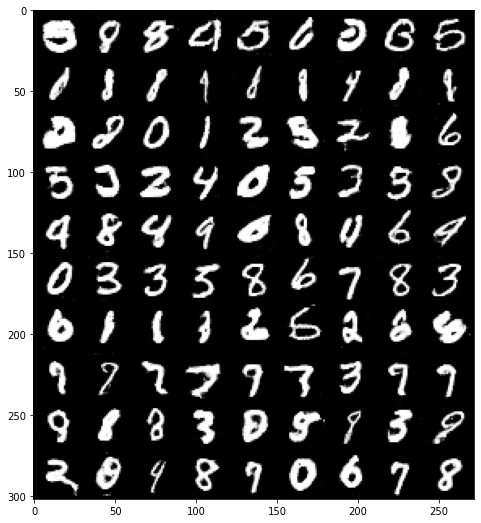

tensor(0.0825, device='cuda:0')


In [8]:
with open(path, 'rb') as handle:
    data = pickle.load(handle)

x0 = torch.tensor(data['x0'], device='cuda')
x_per = torch.tensor(data['x_per'], device='cuda')

print(f"{data['params']['self']} - {data['params']['distance']}")
#grid_plot(x0, nrows=9)
grid_plot(x_per, nrows=9)

print(((x0 - x_per)**2).mean())